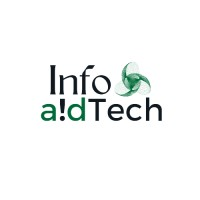

# Task done by :- pawan kumar

### Problem Statement

### Create a machine learning model that can recommend movies to users based on their preferences

In [1]:
# import all important library 
import numpy as np
import pandas as pd
import ast
from sklearn.feature_extraction.text import CountVectorizer
import nltk
from nltk.stem.porter import PorterStemmer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
# Load Dataset
mv = pd.read_csv("movies_full.csv")
cr = pd.read_csv("credits.csv")

In [3]:
# view dataset
mv.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
2309,0,"[{""id"": 28, ""name"": ""Action""}]",NaN,244339,[],cn,逃出生天,"On the hottest day in 50 years, a serious fire...",1.583918,"[{""name"": ""Sun Entertainment Culture"", ""id"": 2...","[{""iso_3166_1"": ""HK"", ""name"": ""Hong Kong""}, {""...",2013-03-10,0,107.0,"[{""iso_639_1"": ""cn"", ""name"": ""\u5e7f\u5dde\u8b...",Released,NaN,Out of Inferno,5.8,11
665,65000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",NaN,10783,"[{""id"": 902, ""name"": ""weather forecast""}, {""id...",en,Lucky Numbers,Russ Richards is a TV weatherman and local cel...,2.952595,"[{""name"": ""Paramount Pictures"", ""id"": 4}, {""na...","[{""iso_3166_1"": ""FR"", ""name"": ""France""}, {""iso...",2000-10-27,0,105.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,When they put their heads together... it's a n...,Lucky Numbers,4.9,52
4479,730000,"[{""id"": 37, ""name"": ""Western""}]",NaN,288,"[{""id"": 75, ""name"": ""gunslinger""}, {""id"": 797,...",en,High Noon,High Noon is about a recently freed leader of ...,18.644023,"[{""name"": ""United Artists"", ""id"": 60}, {""name""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1952-03-27,8000000,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The story of a man who was too proud to run.,High Noon,7.6,334
321,0,"[{""id"": 35, ""name"": ""Comedy""}]",NaN,77953,"[{""id"": 6078, ""name"": ""politics""}, {""id"": 6083...",en,The Campaign,Two rival politicians compete to win an electi...,16.460356,"[{""name"": ""Everyman Pictures"", ""id"": 2242}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-08-09,104907746,85.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,May The Best Loser Win.,The Campaign,5.6,578
1933,0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 35, ""nam...",NaN,19803,"[{""id"": 6149, ""name"": ""police""}, {""id"": 6270, ...",en,Underclassman,A young detective goes undercover at an elite ...,2.083856,"[{""name"": ""Miramax Films"", ""id"": 14}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2005-09-02,0,95.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Underclassman,5.5,28


In [4]:
# view Dataset
cr.sample(5)

,movie_id,title,cast,crew
2457,9285,Road Trip,"[{""cast_id"": 13, ""character"": ""Josh Parker"", ""...","[{""credit_id"": ""52fe44e1c3a36847f80afa19"", ""de..."
3698,10339,Moby Dick,"[{""cast_id"": 11, ""character"": ""Captain Ahab"", ...","[{""credit_id"": ""52fe435c9251416c7500d6bd"", ""de..."
1748,1259,Notes on a Scandal,"[{""cast_id"": 2, ""character"": ""Barbara Covett"",...","[{""credit_id"": ""52fe42ebc3a36847f802cc2b"", ""de..."
1247,13536,City By The Sea,"[{""cast_id"": 1, ""character"": ""Vincent LaMarca""...","[{""credit_id"": ""52fe45779251416c7505784f"", ""de..."
3004,1832,Dogma,"[{""cast_id"": 1, ""character"": ""Bartleby"", ""cred...","[{""credit_id"": ""52fe4318c3a36847f8039ec1"", ""de..."


In [5]:
# check shape
mv.shape

(4803, 20)

In [6]:
# check shape
cr.shape

(4803, 4)

In [7]:
# marge Dataset  
df = mv.merge(cr,on="title")

In [8]:
# after merge check shape
df.shape

(4809, 23)

In [9]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [10]:
# drop unuse columns
# genres
# id
# keywords
# title
# overview
# cast
# crew

df= df[['genres','id','keywords','title','overview','cast','crew']]

In [11]:
# after drop
df.sample(5)

,genres,id,keywords,title,overview,cast,crew
367,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name...",179,"[{""id"": 242, ""name"": ""new york""}, {""id"": 407, ...",The Interpreter,"After Silvia Broome, an interpreter at United ...","[{""cast_id"": 2, ""character"": ""Silvia Broome"", ...","[{""credit_id"": ""52fe4223c3a36847f8006e9f"", ""de..."
718,"[{""id"": 28, ""name"": ""Action""}, {""id"": 878, ""na...",8914,"[{""id"": 2988, ""name"": ""shark attack""}, {""id"": ...",Deep Blue Sea,On a remote former submarine refueling facilit...,"[{""cast_id"": 14, ""character"": ""Carter Blake"", ...","[{""credit_id"": ""52fe44c7c3a36847f80a9971"", ""de..."
1430,"[{""id"": 18, ""name"": ""Drama""}]",321741,"[{""id"": 579, ""name"": ""american football""}, {""i...",Concussion,A dramatic thriller based on the incredible tr...,"[{""cast_id"": 0, ""character"": ""Dr. Bennet Omalu...","[{""credit_id"": ""54c88589c3a36874ac0054a4"", ""de..."
3734,"[{""id"": 18, ""name"": ""Drama""}, {""id"": 53, ""name...",29920,"[{""id"": 172164, ""name"": ""consignment""}]",Easy Money,A three-tiered story centered around drugs and...,"[{""cast_id"": 15, ""character"": ""Johan 'JW' West...","[{""credit_id"": ""52fe4604c3a368484e07c061"", ""de..."
2815,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 53, ""nam...",578,"[{""id"": 1495, ""name"": ""fishing""}, {""id"": 1913,...",Jaws,An insatiable great white shark terrorizes the...,"[{""cast_id"": 15, ""character"": ""Police Chief Ma...","[{""credit_id"": ""52fe4255c3a36847f801603d"", ""de..."


In [12]:
# check null values in DataFrame
df.isna().sum()

genres      0
id          0
keywords    0
title       0
overview    3
cast        0
crew        0
dtype: int64

In [13]:
# Remove null values in Dataframe
df.dropna(inplace=True)

In [14]:
# check null values after Drop 
df.isna().sum()

genres      0
id          0
keywords    0
title       0
overview    0
cast        0
crew        0
dtype: int64

In [15]:
# check duplicate values in DataFrame
df.duplicated().sum()

0

In [16]:
# check 0 index values of genres in DataFrame
df.iloc[0].genres

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [17]:
# create function for Extraction genres columns only name  
def convert(obj):
    l=[]
    for i in ast.literal_eval(obj):
        l.append(i['name'])
    return l

In [18]:
# apply function 
df['genres']=df['genres'].apply(convert)

In [19]:
# after Extraction Dataframe
df.sample(5)

,genres,id,keywords,title,overview,cast,crew
1244,"[Drama, Romance]",1921,"[{""id"": 1022, ""name"": ""workaholic""}, {""id"": 59...",Sweet November,Nelson is a man devoted to his advertising car...,"[{""cast_id"": 15, ""character"": ""Nelson"", ""credi...","[{""credit_id"": ""52fe4322c3a36847f803cc09"", ""de..."
854,"[Action, Science Fiction]",8202,"[{""id"": 779, ""name"": ""martial arts""}, {""id"": 4...",Æon Flux,"400 years into the future, disease has wiped o...","[{""cast_id"": 1, ""character"": ""Aeon Flux"", ""cre...","[{""credit_id"": ""52fe4495c3a36847f809e6f3"", ""de..."
406,"[Drama, Animation, Family, Comedy]",51052,"[{""id"": 65, ""name"": ""holiday""}, {""id"": 1991, ""...",Arthur Christmas,"Each Christmas, Santa and his vast army of hig...","[{""cast_id"": 2, ""character"": ""Arthur (voice)"",...","[{""credit_id"": ""5913a131925141580d00132d"", ""de..."
804,"[Action, Comedy, Crime, Drama]",10589,"[{""id"": 3345, ""name"": ""bahamas""}, {""id"": 6168,...",After the Sunset,Two master thieves (Brosnan and Hayek) are fin...,"[{""cast_id"": 12, ""character"": ""Max Burdett"", ""...","[{""credit_id"": ""52fe438d9251416c75014e2f"", ""de..."
2007,"[Action, Comedy]",19150,[],The Crew,Four retired mobsters plan one last crime to s...,"[{""cast_id"": 1, ""character"": ""Bobby Bartelleme...","[{""credit_id"": ""52fe47bf9251416c750a41d5"", ""de..."


In [20]:
# apply function
df['keywords']=df['keywords'].apply(convert)

In [21]:
# after Extraction Dataframe
df.sample(5)

,genres,id,keywords,title,overview,cast,crew
1839,[Comedy],10327,"[washington d.c., boston, chambers of a barris...","Legally Blonde 2: Red, White & Blonde","After Elle Woods, the eternally perky, fashion...","[{""cast_id"": 8, ""character"": ""Elle Woods"", ""cr...","[{""credit_id"": ""52fe435a9251416c7500d081"", ""de..."
4639,[],300327,[],Death Calls,An action-packed love story on the Mexican bor...,[],[]
1961,"[Crime, Action, Thriller]",290864,"[martial arts, kung fu, serial killer]",Kung Fu Jungle,A martial arts instructor working at a police ...,"[{""cast_id"": 0, ""character"": ""Hahou Mo"", ""cred...","[{""credit_id"": ""540b09990e0a262b3d00259a"", ""de..."
4358,"[Documentary, Music]",7944,"[new york, film director, legend, song, public...",Shine a Light,Martin Scorsese and the Rolling Stones unite i...,"[{""cast_id"": 7, ""character"": ""Himself"", ""credi...","[{""credit_id"": ""52fe448ac3a36847f809ba97"", ""de..."
1799,"[Comedy, Drama, Romance]",1901,"[midlife crisis, daughter, bad boss]",In Good Company,Dan Foreman is a seasoned advertisement sales ...,"[{""cast_id"": 1, ""character"": ""Carter Duryea"", ...","[{""credit_id"": ""52fe431fc3a36847f803c207"", ""de..."


In [22]:
# check 0 index values of cast in DataFrame
df.iloc[0].cast

'[{"cast_id": 242, "character": "Jake Sully", "credit_id": "5602a8a7c3a3685532001c9a", "gender": 2, "id": 65731, "name": "Sam Worthington", "order": 0}, {"cast_id": 3, "character": "Neytiri", "credit_id": "52fe48009251416c750ac9cb", "gender": 1, "id": 8691, "name": "Zoe Saldana", "order": 1}, {"cast_id": 25, "character": "Dr. Grace Augustine", "credit_id": "52fe48009251416c750aca39", "gender": 1, "id": 10205, "name": "Sigourney Weaver", "order": 2}, {"cast_id": 4, "character": "Col. Quaritch", "credit_id": "52fe48009251416c750ac9cf", "gender": 2, "id": 32747, "name": "Stephen Lang", "order": 3}, {"cast_id": 5, "character": "Trudy Chacon", "credit_id": "52fe48009251416c750ac9d3", "gender": 1, "id": 17647, "name": "Michelle Rodriguez", "order": 4}, {"cast_id": 8, "character": "Selfridge", "credit_id": "52fe48009251416c750ac9e1", "gender": 2, "id": 1771, "name": "Giovanni Ribisi", "order": 5}, {"cast_id": 7, "character": "Norm Spellman", "credit_id": "52fe48009251416c750ac9dd", "gender": 

In [23]:
# create function for Extraction cast columns only name  
def convert_cast(obj):
    l=[]
    counter=0
    for i in ast.literal_eval(obj):
        if counter != 3:
            l.append(i['name'])
            counter +=1
        else :
            break
    return l

In [24]:
# apply function
df['cast']=df['cast'].apply(convert_cast)

In [25]:
# after Extraction Dataframe
df.sample(2)

,genres,id,keywords,title,overview,cast,crew
1229,"[Drama, Romance]",10647,"[child's point of view, candlelight vigil, goo...",Pay It Forward,"Like some other kids, 12-year-old Trevor McKin...","[Kevin Spacey, Helen Hunt, Haley Joel Osment]","[{""credit_id"": ""52fe439b9251416c75016fd1"", ""de..."
16,"[Science Fiction, Action, Adventure]",24428,"[new york, shield, marvel comic, superhero, ba...",The Avengers,When an unexpected enemy emerges and threatens...,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]","[{""credit_id"": ""52fe4495c3a368484e02b1cf"", ""de..."


In [26]:
# check 0 index values of crew in DataFrame
df.iloc[0].crew

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [27]:
# create function for Extraction cast columns only name 
def fatch(obj):
    l=[]
    for i in ast.literal_eval(obj):
        if i['job']== 'Director':
            l.append(i['name'])
            break
    return l

In [28]:
# apply function
df['crew']=df['crew'].apply(fatch)

In [29]:
# after Extraction Dataframe
df.head(2)

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"In the 22nd century, a paraplegic Marine is di...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]


In [30]:
# apply lambda function for split overview columns
df['overview']=df['overview'].apply(lambda x:x.split())

In [31]:
# after apply lambda function 
df.head()

,genres,id,keywords,title,overview,cast,crew
0,"[Action, Adventure, Fantasy, Science Fiction]",19995,"[culture clash, future, space war, space colon...",Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,"[Adventure, Fantasy, Action]",285,"[ocean, drug abuse, exotic island, east india ...",Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,"[Action, Adventure, Crime]",206647,"[spy, based on novel, secret agent, sequel, mi...",Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,"[Action, Crime, Drama, Thriller]",49026,"[dc comics, crime fighter, terrorist, secret i...",The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,"[Action, Adventure, Science Fiction]",49529,"[based on novel, mars, medallion, space travel...",John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [32]:
# Replace all space in all columns
df['genres']=df['genres'].apply(lambda x:[i.replace(" ","")for i in x])
df['keywords']=df['keywords'].apply(lambda x:[i.replace(" ","")for i in x])
df['overview']=df['overview'].apply(lambda x:[i.replace(" ","")for i in x])
df['cast']=df['cast'].apply(lambda x:[i.replace(" ","")for i in x])
df['crew']=df['crew'].apply(lambda x:[i.replace(" ","")for i in x])

In [33]:
# After replace white space
df.sample(5)

,genres,id,keywords,title,overview,cast,crew
3447,"[Comedy, Horror]",10925,"[femalenudity, crematorium, nudity, punk, comp...",The Return of the Living Dead,"[When, a, bumbling, pair, of, employees, at, a...","[CluGulager, JamesKaren, DonCalfa]",[DanO'Bannon]
3678,[Family],447027,[],Running Forever,"[After, being, estranged, since, her, mother's...",[],[]
2610,[Romance],13539,"[carrace, privateschool, diner]",Here On Earth,"[A, rich, college, kid, is, taught, a, lesson,...","[LeeleeSobieski, ChrisKlein, JoshHartnett]",[MarkPiznarski]
1339,"[Drama, Family]",62837,"[dolphin, boy, trap, summer, tail]",Dolphin Tale,"[A, story, centered, on, the, friendship, betw...","[MorganFreeman, AshleyJudd, HarryConnickJr.]",[CharlesMartinSmith]
1317,"[Drama, Thriller]",11306,"[newyork, surgeon, british, suspense, morgue, ...",Extreme Measures,"[Thriller, about, Guy, Luthan, (Hugh, Grant),,...","[HughGrant, GeneHackman, SarahJessicaParker]",[MichaelApted]


In [34]:
# create new columns and marge columns
df['tags']= df['overview'] + df['genres'] + df['keywords'] + df['cast'] + df['crew']

In [35]:
df.sample(3)

,genres,id,keywords,title,overview,cast,crew,tags
242,"[Action, Adventure, ScienceFiction]",166424,"[teleportation, transformation, telekinesis, p...",Fantastic Four,"[Four, young, outsiders, teleport, to, a, dang...","[MilesTeller, KateMara, MichaelB.Jordan]",[JoshTrank],"[Four, young, outsiders, teleport, to, a, dang..."
4218,"[Crime, Drama, Romance]",1651,"[exoticisland, secret, loveofone'slife, planta...",Mississippi Mermaid,"[Adapted, from, a, story, by, William, Irish,,...","[Jean-PaulBelmondo, CatherineDeneuve, MichelBo...",[FrançoisTruffaut],"[Adapted, from, a, story, by, William, Irish,,..."
2902,"[Thriller, ScienceFiction, Mystery]",10133,"[doublelife, undercover, lie, wife, company, i...",Cypher,"[An, unsuspecting,, disenchanted, man, finds, ...","[JeremyNortham, LucyLiu, NigelBennett]",[VincenzoNatali],"[An, unsuspecting,, disenchanted, man, finds, ..."


In [36]:
# create new dataFrame with 3 columns
new_df = df[['id','title','tags']]

In [37]:
new_df

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."
...,...,...,...
4804,9367,El Mariachi,"[El, Mariachi, just, wants, to, play, his, gui..."
4805,72766,Newlyweds,"[A, newlywed, couple's, honeymoon, is, upended..."
4806,231617,"Signed, Sealed, Delivered","[""Signed,, Sealed,, Delivered"", introduces, a,..."
4807,126186,Shanghai Calling,"[When, ambitious, New, York, attorney, Sam, is..."


In [38]:
# # check 0 index values of tags in DataFrame
new_df['tags'][0]

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'JamesCameron']

In [39]:
# apply lambda function for join all values in tags 
new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))

C:\Users\user\AppData\Local\Temp\ipykernel_7660\3789622323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x:" ".join(x))


In [40]:
# after join  
new_df['tags'][2]

'A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. While M battles political forces to keep the secret service alive, Bond peels back the layers of deceit to reveal the terrible truth behind SPECTRE. Action Adventure Crime spy basedonnovel secretagent sequel mi6 britishsecretservice unitedkingdom DanielCraig ChristophWaltz LéaSeydoux SamMendes'

In [41]:
new_df.sample(5)

,id,title,tags
3785,64678,The Art of Getting By,"George, a lonely and fatalistic teen who's mad..."
2400,290555,Wolves,The coming-of-age story of Cayden Richards. Fo...
4428,52462,The Pet,A young woman in dire financial straights acce...
1179,1677,Ray,Born on a sharecropping plantation in Northern...
1615,10776,Little Shop of Horrors,Seymour Krelborn is a nerdy orphan working at ...


In [42]:
# # apply lambda function for lower case all words in tags
new_df['tags']=new_df['tags'].apply(lambda x:x.lower())

C:\Users\user\AppData\Local\Temp\ipykernel_7660\770283760.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x:x.lower())


In [43]:
new_df.head(4)

,id,title,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...


In [44]:
ps = PorterStemmer()

In [45]:
# apply stemmer because one word repeated
def stem(text):
    y = []
    for i in text.split():
        y.append(ps.stem(i))
        
    return " ".join(y)

In [46]:
new_df['tags']=new_df['tags'].apply(stem)

C:\Users\user\AppData\Local\Temp\ipykernel_7660\3514595201.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(stem)


In [47]:
# conver all movie for vector form
cv = CountVectorizer(max_features=5000,stop_words="english")

In [48]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [49]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [50]:
cv.get_feature_names()

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '007',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '17th',
 '18',
 '18th',
 '18thcenturi',
 '19',
 '1910',
 '1920',
 '1930',
 '1940',
 '1944',
 '1950',
 '1950s',
 '1960',
 '1960s',
 '1970',
 '1970s',
 '1971',
 '1974',
 '1976',
 '1980',
 '1985',
 '1990',
 '1999',
 '19th',
 '19thcenturi',
 '20',
 '200',
 '2003',
 '2009',
 '20th',
 '21st',
 '23',
 '24',
 '25',
 '30',
 '300',
 '3d',
 '40',
 '50',
 '500',
 '60',
 '70',
 '80',
 'aaron',
 'aaroneckhart',
 'abandon',
 'abduct',
 'abigailbreslin',
 'abil',
 'abl',
 'aboard',
 'abov',
 'abus',
 'academ',
 'academi',
 'accept',
 'access',
 'accid',
 'accident',
 'acclaim',
 'accompani',
 'accomplish',
 'account',
 'accus',
 'ace',
 'achiev',
 'acquaint',
 'act',
 'action',
 'actionhero',
 'activ',
 'activist',
 'activities',
 'actor',
 'actress',
 'actual',
 'ad',
 'adam',
 'adamsandl',
 'adamshankman',
 'adapt',
 'add',
 'addict',
 'adjust',
 'admir',
 'admit',
 'adolesc',
 'adopt',
 'ador',
 'adrienbrodi',
 'adult'

In [51]:
similarty = cosine_similarity(vector)

In [52]:
similarty.shape

(4806, 4806)

In [53]:
sorted(list(enumerate(similarty[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1216, 0.2867696673382022),
 (2409, 0.26901379342448517),
 (3730, 0.2605130246476754),
 (507, 0.255608593705383),
 (539, 0.25038669783359574)]

In [54]:
# create Recommender function
def recommend(movie):
    movie_index = new_df[new_df['title'] == movie].index[0]
    distances = similarty[movie_index]
    movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
    
    for i in movies_list:
        print(new_df.iloc[i[0]] .title)
    return

In [55]:
# finally done Recommender
recommend('Avatar')

Aliens vs Predator: Requiem
Aliens
Falcon Rising
Independence Day
Titan A.E.


In [56]:
# finally done Recommender
recommend('Batman Begins')

The Dark Knight
Batman
Batman
The Dark Knight Rises
10th & Wolf


In [57]:
# finally done Recommender
recommend('The Dark Knight Rises')

The Dark Knight
Batman Returns
Batman
Batman Forever
Batman Begins


In [58]:
# finally done Recommender
recommend("April Fool's Day")

Deterrence
A History of Violence
A Cinderella Story
Boynton Beach Club
Larry Crowne


In [59]:
# finally done Recommender
recommend('Witless Protection')

Dream House
London
Reign Over Me
The Valley of Decision
Alvin and the Chipmunks: The Road Chip


In [60]:
new_df.sample(10)

,id,title,tags
2681,691,The Spy Who Loved Me,russian and british submarin with nuclear miss...
1419,8090,Untraceable,special agent jennif marsh (dian lane) work in...
402,10159,The Rundown,"when travis, the mouthi son of a criminal, dis..."
4608,389,12 Angry Men,the defens and the prosecut have rest and the ...
3370,241771,Beyond the Lights,noni jean is a hot new rise star. but not all ...
885,9767,The Break-Up,cohabit coupl gari and brook find their once-b...
4074,69640,Lies in Plain Sight,“li in plain sight” tell the stori of eva and ...
1166,4257,Scary Movie 4,cindi find out the hous she live in is haunt b...
1356,75531,Isn't She Great,an unsuccess over-the-top actress becom a succ...
619,48988,Hall Pass,when best bud rick and fred begin to show sign...


# Thank you